In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

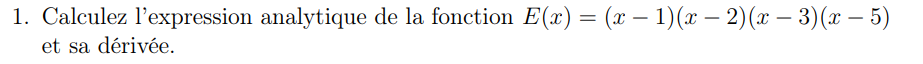

In [11]:
def fonctionE(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

def deriveE(x):
    return misc.derivative(fonctionE,x)

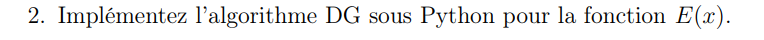

In [15]:
def dgAlgo(eps,nombremax,η,x0):
    v=[]
    count = 0
    for i in range(0,nombremax):
        count+=1
        X=x0 - η*deriveE(x0)
        if abs(X-x0) < eps:
            v.append((X,count))
            return v
        x0=X
        
    v.append((X,count))
    return v

In [16]:
dgAlgo(0.01, 1100, 5, 0.001 )

[(1.500246984629379e+28, 4)]

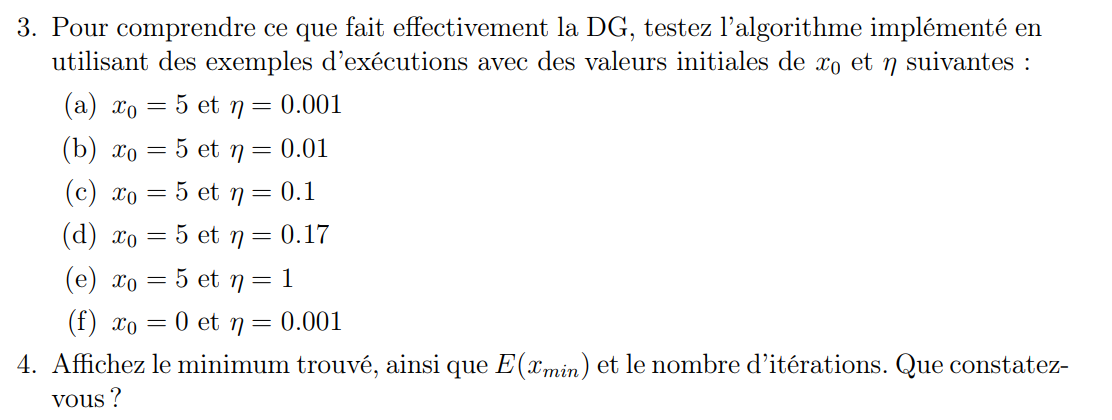

In [17]:
params=[(5, 0.001),(5,0.01),(5,0.1),(5,0.17),(5,1),(0,0.001)]

for x0 ,n in params:
    res = dgAlgo(0.01,1000,n,x0)
    print("Le nomres d'iterations :", res[0][1])
    print("Le X minimum:", res[0][0])
    print("La valeur returner par la fonction E de min est", fonctionE(res[0][0]))

Le nomres d'iterations : 31
Le X minimum: 4.441918519633145
La valeur returner par la fonction E de min est -6.763478042464527
Le nomres d'iterations : 14
Le X minimum: 4.051313739254914
La valeur returner par la fonction E de min est -6.2427206928860475
Le nomres d'iterations : 7
Le X minimum: 1.970713096889272
La valeur returner par la fonction E de min est -0.0886423362134923
Le nomres d'iterations : 6
Le X minimum: -8.865122344402025e+32
La valeur returner par la fonction E de min est 6.17645005755892e+131
Le nomres d'iterations : 5
Le X minimum: 1.0047823756649958e+48
La valeur returner par la fonction E de min est 1.0192671673981714e+192
Le nomres d'iterations : 46
Le X minimum: 1.1895558059642402
La valeur returner par la fonction E de min est -1.0597927750528027


# On constate que le temps de calcul augmente lorsque le pas est tres petit, mais la fonction converge.

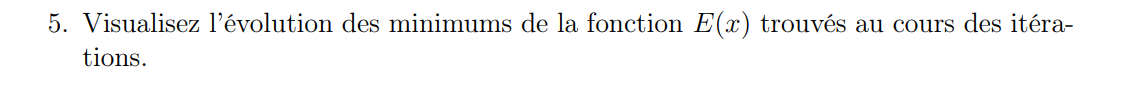

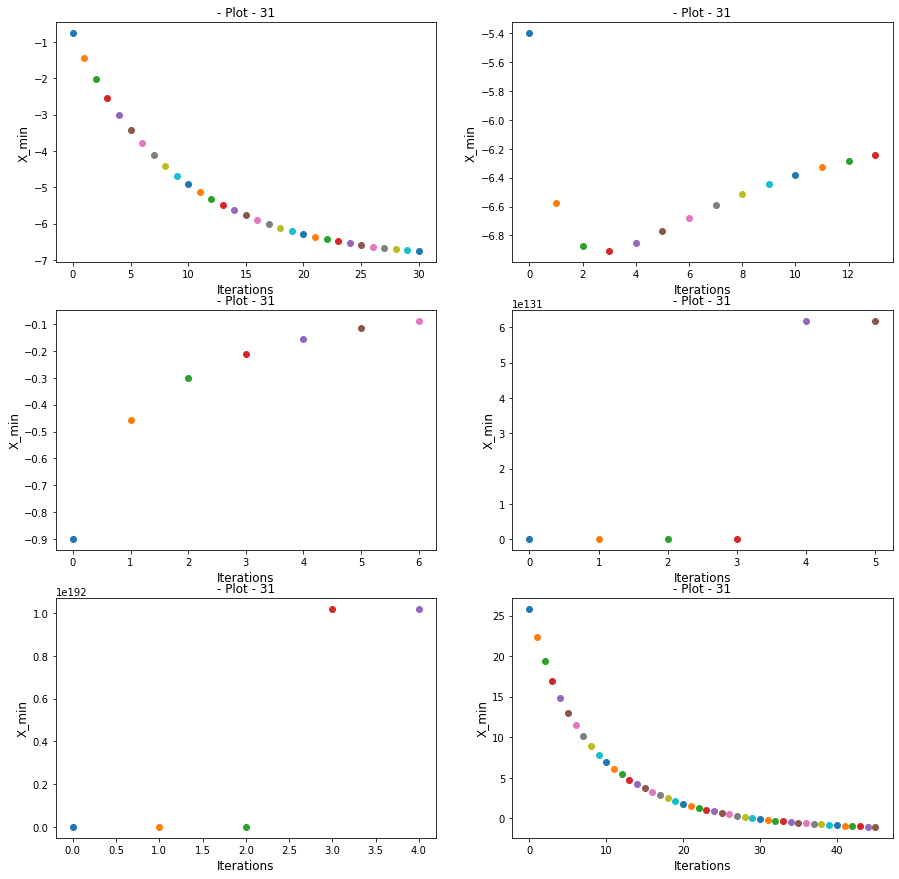

In [36]:
params=[(5, 0.001),(5,0.01),(5,0.1),(5,0.17),(5,1),(0,0.001)]
count=0
epsilon = 0.01
fig,axis=plt.subplots(3, 2, figsize=(15,15))
newaxis=axis.reshape(6,)
    
for x0 ,η in params:
    count+=1
    
    for j in range(0,1000):
        
        X=x0-η*deriveE(x0)
        newaxis[count-1].scatter([j],[fonctionE(X)])
        newaxis[count-1].set_xlabel("Iterations", fontsize=12)
        newaxis[count-1].set_ylabel("X_min", fontsize=12)
        newaxis[count-1].set_title(f"- Plot - {number}", fontsize=12)
        
        if abs(X-x0)<epsilon:
            break
        x0=X
    

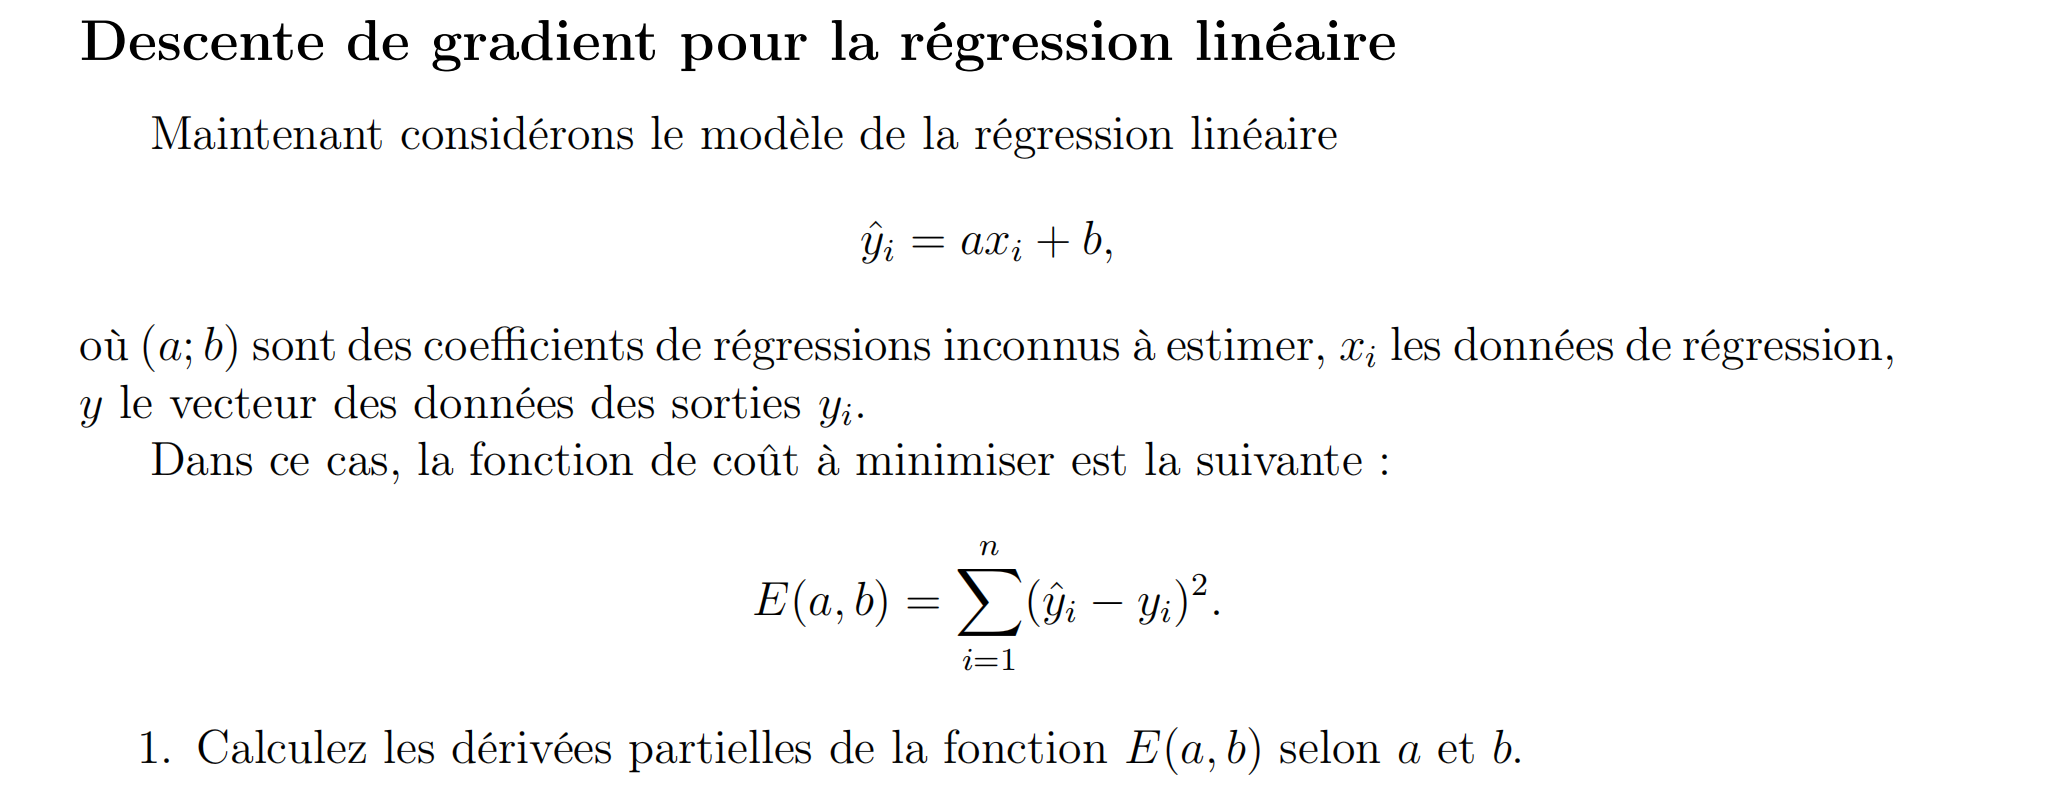

In [43]:
def deriveA(x,y,a,b):
    return 2*x*(a*x+b-y)

def deriveB(x,y,a,b):
    return 2*(a*x+b-y)

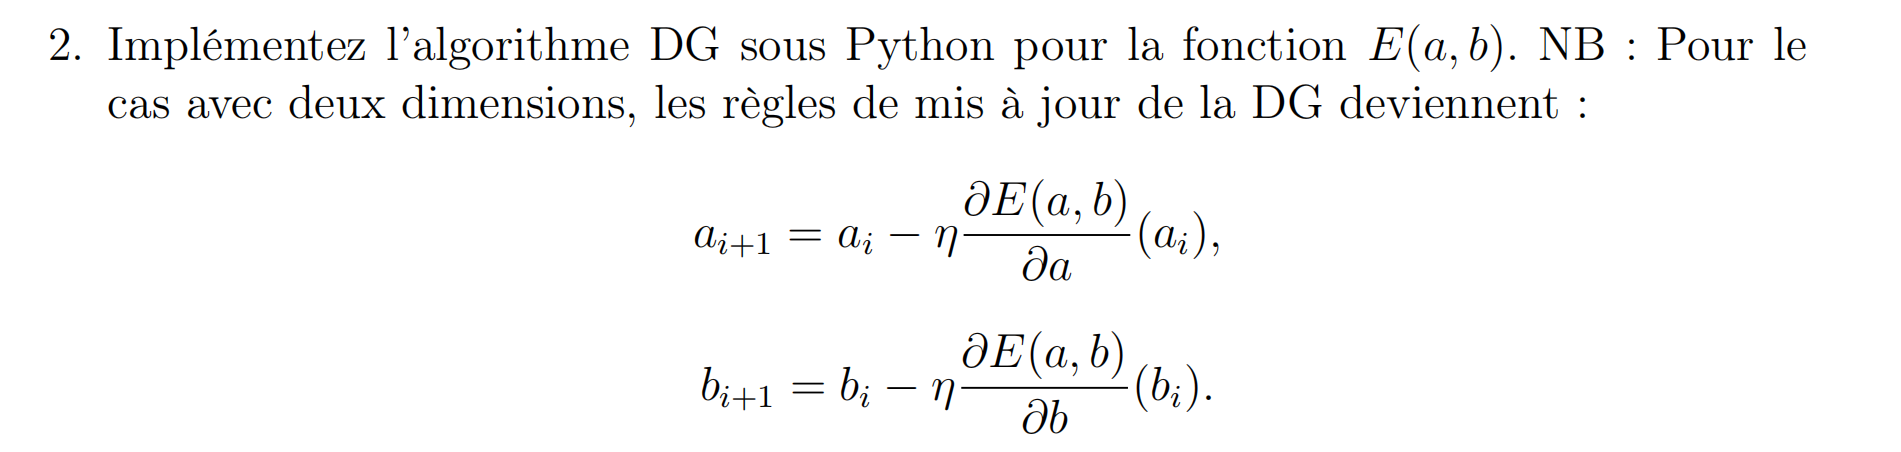

In [44]:
def DG(pas ,nombre_max ,x ,y ,eps = 0.0001):
    #initialisation
    a0 = np.random.random(x.shape[1])[0]
    b0 = np.random.random(x.shape[1])[0]
    
    E = sum( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
    
    for i in range(nombre_max):
        # Calcul de gradient
        ai_1 = a0 - pas * sum( [ deriveA(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
        bi_1 = b0 - pas * sum( [ deriveB(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
        
        a0 = ai_1
        b0 = bi_1
        
        err = sum ( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
        
        if abs(E - err) <= eps:
            return a0 ,b0 ,i, err
            break
        
    return a0 , b0 , i , err

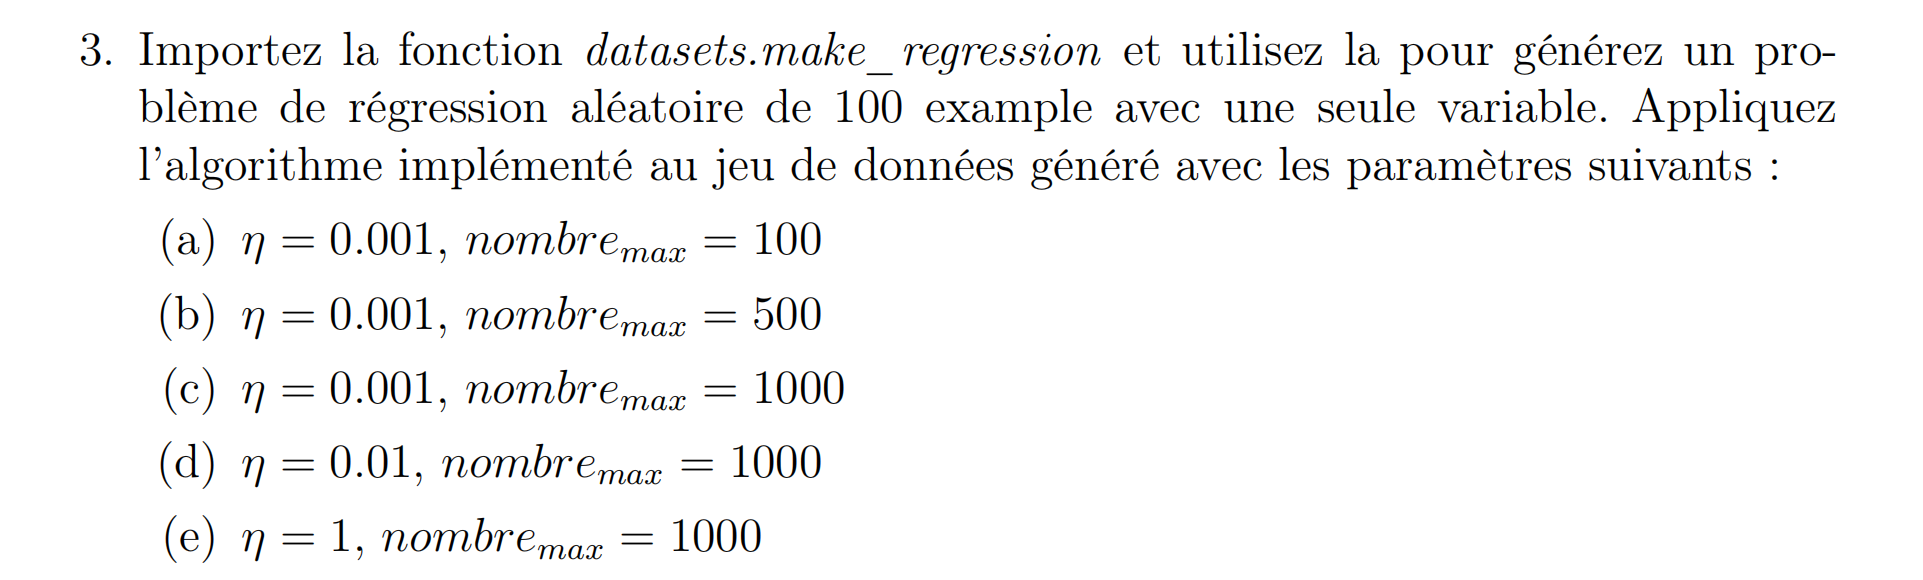

In [45]:
from sklearn.datasets import make_regression

In [46]:
x, y = make_regression(random_state=0 , n_features = 1)

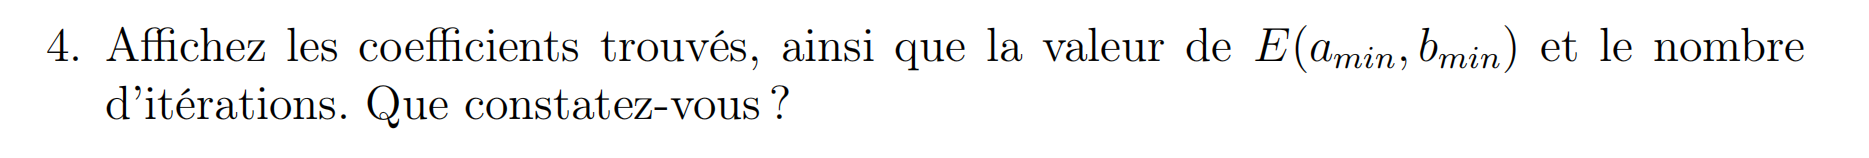

In [47]:
params=[(0.001, 100),(0.001, 500),(0.001, 1000),(0.01, 1000),(1, 1000)]

for pas ,iters in params:
    aa ,bb , iterreturned , err =  DG(pas ,iters ,x ,y)
    print("le nbrs d'iterations :", iterreturned+1)
    print(f"les coefficients trouvés : a_min = {aa}, b_min = {bb} ")
    print(" E( a_min , b_min ) : ", err )
    print("________________________________________")

le nbrs d'iterations : 100
les coefficients trouvés : a_min = [42.38550484], b_min = [1.42850361e-08] 
 E( a_min , b_min ) :  [3.69284194e-14]
________________________________________
le nbrs d'iterations : 500
les coefficients trouvés : a_min = [42.38550486], b_min = [1.75647338e-15] 
 E( a_min , b_min ) :  [2.09808189e-26]
________________________________________
le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [42.38550486], b_min = [1.7659683e-15] 
 E( a_min , b_min ) :  [2.09808189e-26]
________________________________________
le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [-3.21513924e+58], b_min = [-2.73561953e+58] 
 E( a_min , b_min ) :  [1.90733826e+119]
________________________________________


<ipython-input-44-5dcea720e88c>:16: RuntimeWarning: overflow encountered in square
  err = sum ( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
<ipython-input-44-5dcea720e88c>:10: RuntimeWarning: overflow encountered in add
  ai_1 = a0 - pas * sum( [ deriveA(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
<ipython-input-44-5dcea720e88c>:11: RuntimeWarning: overflow encountered in add
  bi_1 = b0 - pas * sum( [ deriveB(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
<ipython-input-44-5dcea720e88c>:16: RuntimeWarning: invalid value encountered in add
  err = sum ( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
<ipython-input-44-5dcea720e88c>:18: RuntimeWarning: invalid value encountered in less_equal
  if abs(E - err) <= eps:
<ipython-input-43-7a710d1894a9>:2: RuntimeWarning: invalid value encountered in add
  return 2*x*(a*x+b-y)
<ipython-input-43-7a710d1894a9>:5: RuntimeWarning: invalid value encountered in add
  return 2*(a*x+b-y)


le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [nan], b_min = [nan] 
 E( a_min , b_min ) :  [nan]
________________________________________


## On constate dés que le pas est petit la fonction de cout est minimiser

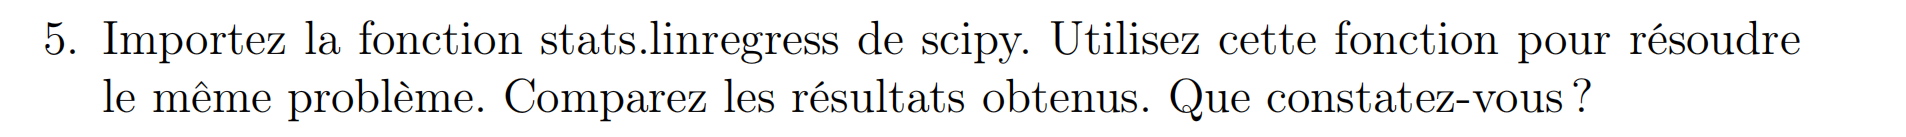

In [60]:
from scipy.stats import linregress
from scipy import stats

In [61]:
mkreg = []
for elem in x:
    mkreg.append(elem.item())

In [62]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mkreg, y)

In [63]:
std_err

6.38005518648544e-08

In [64]:
slope

42.38550485581796

In [65]:
intercept

1.7763568394002505e-15

# On constate que les resultats sont un peu pres similaires

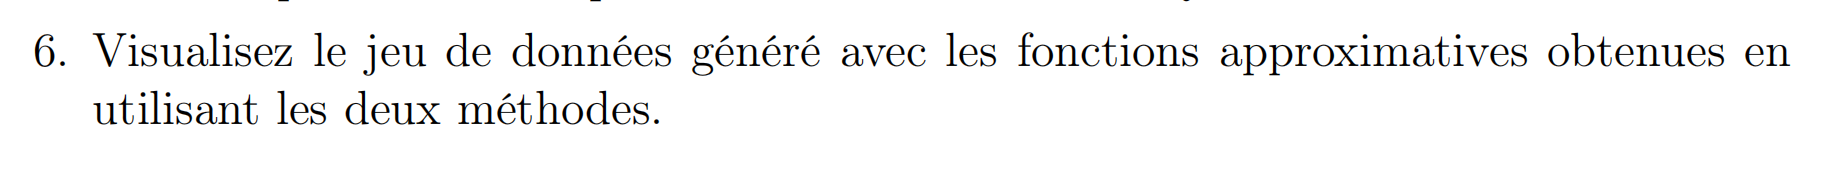

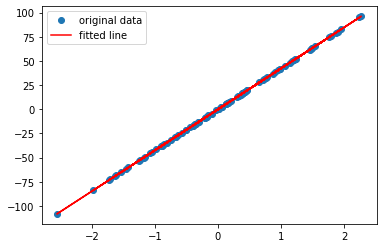

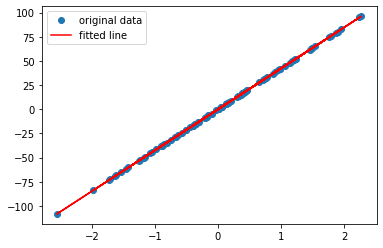

In [66]:
#obtenu par la methode linregress DG
plt.plot(x, y, 'o', label='original data')
plt.plot(x,  1.74746369e-15 + 42.38550486*x, 'r', label='fitted line')
plt.legend()
plt.show()

#obtenu par la methode linregress
plt.figure()
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()